<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/p_chart_%26_np_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates how p chart can be plotted using simulation data. Ref:
https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

In [51]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
p = {'defects':np.random.randint(1,5,25).tolist(),
    'group_size':np.random.randint(10,15,25).tolist()}

# try (10,11,25) for fixed sample size n=10 in the group_size statement above
    
# Convert data to data frame
p = pd.DataFrame(p)

# Add 'p' column to data frame
p['p'] = p['defects']/p['group_size']

print(p)

    defects  group_size         p
0         3          11  0.272727
1         4          13  0.307692
2         1          14  0.071429
3         3          10  0.300000
4         3          13  0.230769
5         4          11  0.363636
6         1          14  0.071429
7         1          13  0.076923
8         3          10  0.300000
9         2          10  0.200000
10        3          12  0.250000
11        3          12  0.250000
12        3          11  0.272727
13        3          13  0.230769
14        4          13  0.307692
15        1          12  0.083333
16        4          13  0.307692
17        4          13  0.307692
18        4          10  0.400000
19        3          12  0.250000
20        2          14  0.142857
21        1          12  0.083333
22        2          14  0.142857
23        4          10  0.400000
24        4          11  0.363636


Your Turn: how do you read in a data set containing the defects and group size? (Hint: use code modules in either X-bar and R or X-bar and S imported data ipynb)

Text(0, 0.5, 'Fraction Defective')

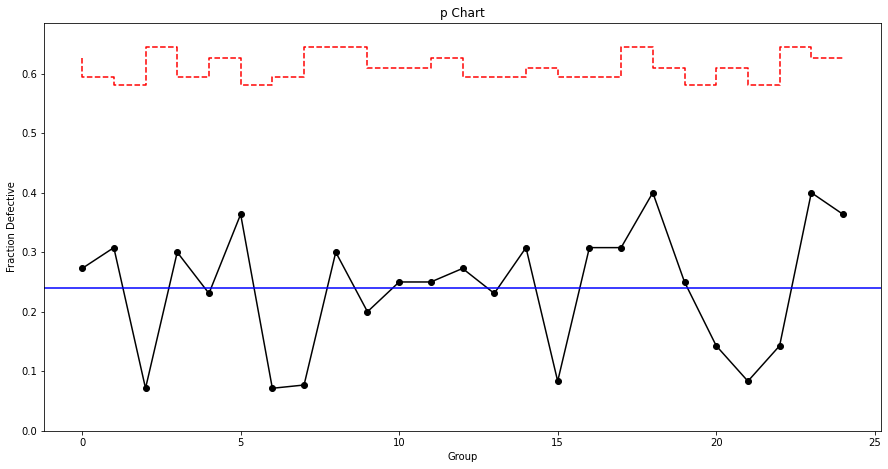

In [52]:
# Plot p-chart
plt.figure(figsize=(15,7.5))
plt.plot(p['p'], linestyle='-', marker='o', color='black')
plt.step(x=range(0,len(p['p'])), y=statistics.mean(p['p'])+3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/(p['group_size']))), color='red', linestyle='dashed')
plt.step(x=range(0,len(p['p'])), y=statistics.mean(p['p'])-3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/(p['group_size']))), color='red', linestyle='dashed')
plt.axhline(statistics.mean(p['p']), color='blue')
plt.ylim(bottom=0)
plt.title('p Chart')
plt.xlabel('Group')
plt.ylabel('Fraction Defective')

In [53]:
# Validate points out of control limits
i = 0
control = True
for group in p['p']:
    if group > (statistics.mean(p['p'])+3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/statistics.mean(p['group_size'])))) or group < (statistics.mean(p['p'])-3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/statistics.mean(p['group_size'])))):
        print('Group', i, 'out of fraction defective cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


Your turn: can you plot np chart based on the codes above?

In [54]:
# prep the data for np chart
data=p
pbar=sum(data['defects'])/sum(data['group_size'])
nbar=statistics.mean(data['group_size'])
# data['pbar']=pbar
print(pbar)
print(nbar)                                              

0.23255813953488372
12.04


Text(0, 0.5, 'Number of Defectives')

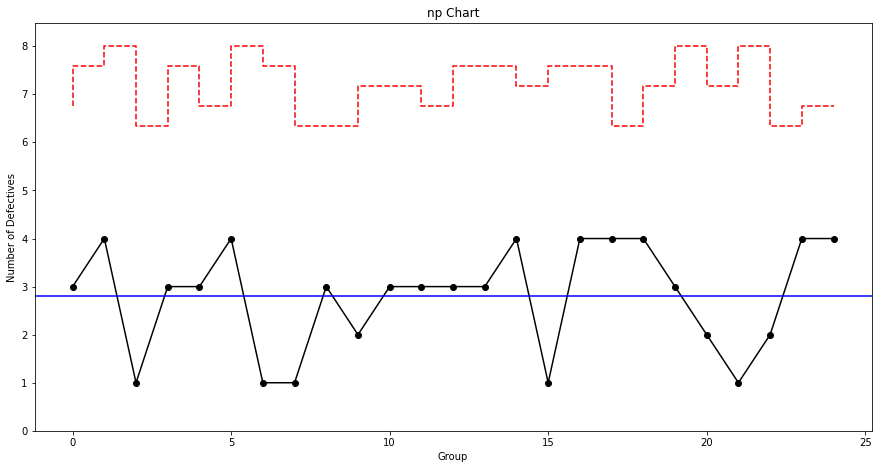

In [55]:
# Plot np-chart
# plotting statistic np is the defects in the data frame
# if the sample size is a variable, there are multiple ways to set up control limits and center line
# the following center line is average of all numbers of defects
# the UCL and LCL considers the individual samples


plt.figure(figsize=(15,7.5))
plt.plot(data['defects'], linestyle='-', marker='o', color='black')
#plt.step(x=range(0,len(p['p'])), y=statistics.mean(p['p'])+3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/(p['group_size']))), color='red', linestyle='dashed')
plt.step(x=range(0,len(data['defects'])), y=(data['group_size'])*pbar+3*(np.sqrt((data['group_size'])*pbar*(1-pbar))), color='red', linestyle='dashed')
plt.step(x=range(0,len(data['defects'])), y=(data['group_size'])*pbar-3*(np.sqrt((data['group_size'])*pbar*(1-pbar))), color='red', linestyle='dashed')
plt.axhline(statistics.mean(data['defects']), color='blue')
plt.ylim(bottom=0)
plt.title('np Chart')
plt.xlabel('Group')
plt.ylabel('Number of Defectives')

You turn: 
1. can you round up or down the center line and control limits to the closest interger? 2. can you modify the aboves codes for c chart (number of defects in a unit) and u chart (number of defects per item in the unit)?